# Recopilación y descarga de datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
from fredapi import Fred

In [2]:
fred_key='9652e799a3cb60819e1a7457b22a8cfe'
fred=Fred(api_key=fred_key)

In [5]:
# tomamos los datos de desempleo de todos los esatdos de EEUU
# ejemplo conel estado de california
# ca_unemp = fred.get_series('CAUR')
# lo hacemos con todos
state_codes = {
    'Alabama': 'ALUR',
    'Alaska': 'AKUR',
    'Arizona': 'AZUR',
    'Arkansas': 'ARUR',
    'California': 'CAUR',
    'Colorado': 'COUR',
    'Connecticut': 'CTUR',
    'Delaware': 'DEUR',
    'District of Columbia': 'DCUR',
    'Florida': 'FLUR',
    'Georgia': 'GAUR',
    'Hawaii': 'HIUR',
    'Idaho': 'IDUR',
    'Illinois': 'ILUR',
    'Indiana': 'INUR',
    'Iowa': 'IAUR',
    'Kansas': 'KSUR',
    'Kentucky': 'KYUR',
    'Louisiana': 'LAUR',
    'Maine': 'MEUR',
    'Maryland': 'MDUR',
    'Massachusetts': 'MAUR',
    'Michigan': 'MIUR',
    'Minnesota': 'MNUR',
    'Mississippi': 'MSUR',
    'Missouri': 'MOUR',
    'Montana': 'MTUR',
    'Nebraska': 'NEUR',
    'Nevada': 'NVUR',
    'New Hampshire': 'NHUR',
    'New Jersey': 'NJUR',
    'New Mexico': 'NMUR',
    'New York': 'NYUR',
    'North Carolina': 'NCUR',
    'North Dakota': 'NDUR',
    'Ohio': 'OHUR',
    'Oklahoma': 'OKUR',
    'Oregon': 'ORUR',
    'Pennsylvania': 'PAUR',
    'Rhode Island': 'RIUR',
    'South Carolina': 'SCUR',
    'South Dakota': 'SDUR',
    'Tennessee': 'TNUR',
    'Texas': 'TXUR',
    'Utah': 'UTUR',
    'Vermont': 'VTUR',
    'Virginia': 'VAUR',
    'Washington': 'WAUR',
    'West Virginia': 'WVUR',
    'Wisconsin': 'WIUR',
    'Wyoming': 'WYUR'
}
data_ur={}
for state, code in state_codes.items():
    try:
        data_ur[state] = fred.get_series(code)
    except Exception as e:
        print(f"No se pudo obtener datos para {state} ({code}): {e}")
        data_ur[state] = None  # O puedes omitir el estado
df_ur=pd.DataFrame(data_ur)

In [7]:
# Ingreso medio real del hogar por estado (Real Median Household Income)
# Diccionario: nombre del estado -> código FRED para tasa de participación laboral
# Diccionario con códigos confirmados (puedes ampliarlo buscando en FRED)
median_income_codes = {
    'Alabama': 'MEHOINUSALA672N',
    'Alaska': 'MEHOINUSAKA672N',
    'Arizona': 'MEHOINUSAZA672N',
    'Arkansas': 'MEHOINUSARA672N',
    'California': 'MEHOINUSCAA672N',
    'Colorado': 'MEHOINUSCOA672N',
    'Connecticut': 'MEHOINUSCTA672N',
    'Delaware': 'MEHOINUSDEA672N',
    'District of Columbia': 'MEHOINUSDCA672N',
    'Florida': 'MEHOINUSFLA672N',
    'Georgia': 'MEHOINUSGAA672N',
    'Hawaii': 'MEHOINUSHIA672N',
    'Idaho': 'MEHOINUSIDA672N',
    'Illinois': 'MEHOINUSILA672N',
    'Indiana': 'MEHOINUSINA672N',
    'Iowa': 'MEHOINUSIOA672N',
    'Kansas': 'MEHOINUSKSA672N',
    'Kentucky': 'MEHOINUSKYA672N',
    'Louisiana': 'MEHOINUSLAA672N',
    'Maine': 'MEHOINUSMEA672N',
    'Maryland': 'MEHOINUSMDA672N',
    'Massachusetts': 'MEHOINUSMAA672N',
    'Michigan': 'MEHOINUSMIA672N',
    'Minnesota': 'MEHOINUSMNA672N',
    'Mississippi': 'MEHOINUSMSA672N',
    'Missouri': 'MEHOINUSMOA672N',
    'Montana': 'MEHOINUSMTA672N',
    'Nebraska': 'MEHOINUSNEA672N',
    'Nevada': 'MEHOINUSNVA672N',
    'New Hampshire': 'MEHOINUSNHA672N',
    'New Jersey': 'MEHOINUSNJA672N',
    'New Mexico': 'MEHOINUSNMA672N',
    'New York': 'MEHOINUSNYA672N',
    'North Carolina': 'MEHOINUSNCA672N',
    'North Dakota': 'MEHOINUSNDA672N',
    'Ohio': 'MEHOINUSOHA672N',
    'Oklahoma': 'MEHOINUSOKA672N',
    'Oregon': 'MEHOINUSORA672N',
    'Pennsylvania': 'MEHOINUSPAA672N',
    'Rhode Island': 'MEHOINUSRIA672N',
    'South Carolina': 'MEHOINUSSCA672N',
    'South Dakota': 'MEHOINUSSDA672N',
    'Tennessee': 'MEHOINUSTNA672N',
    'Texas': 'MEHOINUSTXA672N',
    'Utah': 'MEHOINUSUTA672N',
    'Vermont': 'MEHOINUSVTA672N',
    'Virginia': 'MEHOINUSVAA672N',
    'Washington': 'MEHOINUSWAA672N',
    'West Virginia': 'MEHOINUSWVA672N',
    'Wisconsin': 'MEHOINUSWIA672N',
    'Wyoming': 'MEHOINUSWYA672N'
}

data_inc = {}
for state, code in median_income_codes.items():
    try:
        data_inc[state] = fred.get_series(code)
    except Exception as e:
        print(f"No se pudo obtener datos para {state} ({code}): {e}")
        data_inc[state] = None  # O puedes omitir el estado
df_inc=pd.DataFrame(data_inc)

No se pudo obtener datos para Iowa (MEHOINUSIOA672N): Bad Request.  The series does not exist.


In [9]:
# Índice de precios de la vivienda (House Price Index, FHFA)
house_price_index_codes = {
    'Alabama': 'ALSTHPI',
    'Alaska': 'AKSTHPI',
    'Arizona': 'AZSTHPI',
    'Arkansas': 'ARSTHPI',
    'California': 'CASTHPI',
    'Colorado': 'COSTHPI',
    'Connecticut': 'CTSTHPI',
    'Delaware': 'DESTHPI',
    'District of Columbia': 'DCSTHPI',
    'Florida': 'FLSTHPI',
    'Georgia': 'GASTHPI',
    'Hawaii': 'HISTHPI',
    'Idaho': 'IDSTHPI',
    'Illinois': 'ILSTHPI',
    'Indiana': 'INSTHPI',
    'Iowa': 'IASTHPI',
    'Kansas': 'KSSTHPI',
    'Kentucky': 'KYSTHPI',
    'Louisiana': 'LASTHPI',
    'Maine': 'MESTHPI',
    'Maryland': 'MDSTHPI',
    'Massachusetts': 'MASTHPI',
    'Michigan': 'MISTHPI',
    'Minnesota': 'MNSTHPI',
    'Mississippi': 'MSSTHPI',
    'Missouri': 'MOSTHPI',
    'Montana': 'MTSTHPI',
    'Nebraska': 'NESTHPI',
    'Nevada': 'NVSTHPI',
    'New Hampshire': 'NHSTHPI',
    'New Jersey': 'NJSTHPI',
    'New Mexico': 'NMSTHPI',
    'New York': 'NYSTHPI',
    'North Carolina': 'NCSTHPI',
    'North Dakota': 'NDSTHPI',
    'Ohio': 'OHSTHPI',
    'Oklahoma': 'OKSTHPI',
    'Oregon': 'ORSTHPI',
    'Pennsylvania': 'PASTHPI',
    'Rhode Island': 'RISTHPI',
    'South Carolina': 'SCSTHPI',
    'South Dakota': 'SDSTHPI',
    'Tennessee': 'TNSTHPI',
    'Texas': 'TXSTHPI',
    'Utah': 'UTSTHPI',
    'Vermont': 'VTSTHPI',
    'Virginia': 'VASTHPI',
    'Washington': 'WASTHPI',
    'West Virginia': 'WVSTHPI',
    'Wisconsin': 'WISTHPI',
    'Wyoming': 'WYSTHPI'
}

data_house = {}
for state, code in house_price_index_codes.items():
    try:
        data_house[state] = fred.get_series(code)
    except Exception as e:
        print(f"No se pudo obtener datos para {state} ({code}): {e}")
        data_house[state] = None  # O puedes omitir el estado
df_house=pd.DataFrame(data_house)
    

In [11]:
# CPI (Consumer Price Index) -- solo está disponible en algunos estados
cpi_state_codes = {
    'Delaware': 'DEPCPI',
    'District of Columbia': 'DCPCPI',
    'Florida': 'FLPCPI',
    'Georgia': 'GAPCPI',
    'Hawaii': 'HIPCPI',
    'Idaho': 'IDPCPI',
    'Nebraska': 'NEPCPI',
    'Nevada': 'NVPCPI',
    'New Hampshire': 'NHPCPI',
    'New Jersey': 'NJPCPI',
    'New Mexico': 'NMPCPI',
    'New York': 'NYPCPI',
    'Oregon': 'ORPCPI',
    'Pennsylvania': 'PAPCPI',
    'Rhode Island': 'RIPCPI',
    'South Carolina': 'SCPCPI',
    'South Dakota': 'SDPCPI'
}
data_cpi = {}
for state, code in cpi_state_codes.items():
    try:
        data_cpi[state] = fred.get_series(code)
    except Exception as e:
        print(f"No se pudo obtener datos para {state} ({code}): {e}")
        data_cpi[state] = None  # O puedes omitir el estado
df_cpi=pd.DataFrame(data_cpi)
    

In [13]:
df_cpi

,Delaware,District of Columbia,Florida,Georgia,Hawaii,Idaho,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota
1929-01-01,1031.0,1324.0,519.0,343.0,NaN,499.0,584.0,874.0,688.0,921.0,405.0,1156.0,666.0,776.0,881.0,267.0,415.0
1930-01-01,858.0,1314.0,468.0,303.0,NaN,488.0,510.0,834.0,648.0,851.0,333.0,1042.0,605.0,717.0,795.0,239.0,357.0
1931-01-01,776.0,1253.0,397.0,254.0,NaN,366.0,409.0,665.0,560.0,741.0,287.0,889.0,504.0,605.0,718.0,203.0,242.0
1932-01-01,591.0,1107.0,317.0,197.0,NaN,268.0,303.0,557.0,430.0,593.0,208.0,686.0,377.0,455.0,584.0,156.0,189.0
1933-01-01,566.0,945.0,289.0,202.0,NaN,228.0,273.0,499.0,420.0,529.0,211.0,634.0,357.0,423.0,569.0,172.0,136.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-01,55497.0,90691.0,56539.0,51460.0,56995.0,49607.0,56745.0,54656.0,67535.0,70430.0,46483.0,70395.0,56594.0,60245.0,59250.0,48769.0,59422.0
2021-01-01,59619.0,97764.0,62238.0,56079.0,61051.0,55408.0,63517.0,60775.0,73672.0,76040.0,50682.0,76040.0,62379.0,63779.0,62898.0,53220.0,67014.0
2022-01-01,63890.0,100153.0,64171.0,57193.0,62522.0,56984.0,66923.0,62493.0,74952.0,77456.0,53069.0,77382.0,63986.0,65336.0,64075.0,54378.0,69736.0
2023-01-01,66557.0,105518.0,67821.0,59691.0,65888.0,59192.0,71006.0,65822.0,78936.0,81325.0,55166.0,81630.0,67514.0,68649.0,67105.0,57180.0,72546.0


In [15]:
# algunos esatdos no tienen disponible en Fred el cpi
# vamos a asociar cada estado que no tiene cpi particualr con el valor regional
cpi_regional_codes = {
    'Northeast': 'CUUR0100SA0',
    'Midwest': 'CUUR0200SA0',
    'South': 'CUUR0300SA0',
    'West': 'CUUR0400SA0'
}
regions = {
    'Northeast': ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'New Jersey', 'Pennsylvania'],
    'Midwest': ['Ohio', 'Indiana', 'Illinois', 'Michigan', 'Wisconsin', 'Minnesota', 'Iowa', 'Missouri', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas'],
    'South': ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Arkansas', 'Louisiana', 'Oklahoma', 'Texas'],
    'West': ['Montana', 'Idaho', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']
}
all_states = [
    'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware',
    'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa',
    'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
    'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey',
    'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
    'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
    'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'
]

# cpi regional

data_cpi_reg = {}
for state, code in cpi_regional_codes.items():
    try:
        data_cpi_reg[state] = fred.get_series(code)
    except Exception as e:
        print(f"No se pudo obtener datos para {state} ({code}): {e}")
        data_cpi_reg[state] = None  # O puedes omitir el estado
df_cpi_reg=pd.DataFrame(data_cpi_reg)
    

In [17]:
# ahora asociamos cada estado con su región y creamos un df donde aquellos estados que no tengas valores
# cpi, tomen el valor del cpi regional

# Primero, crea un mapeo de estado a región
state_to_region = {}
for region, states in regions.items():
    for state in states:
        state_to_region[state] = region

In [19]:
# DataFrame final
df_cpi_final = pd.DataFrame(index=df_cpi.index)

for state in all_states:
    if state in df_cpi.columns:
        # Usa el CPI estatal si existe
        df_cpi_final[state] = df_cpi[state]
    else:
        # Si no, usa el CPI regional correspondiente
        region = state_to_region.get(state)
        if region and region in df_cpi_reg.columns:
            df_cpi_final[state] = df_cpi_reg[region]
        else:
            df_cpi_final[state] = pd.NA  # Si no hay región, asigna NA

In [21]:
df_cpi_final

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
1929-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1031.0,1324.0,519.0,...,415.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1930-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,858.0,1314.0,468.0,...,357.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1931-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,776.0,1253.0,397.0,...,242.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1932-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,591.0,1107.0,317.0,...,189.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1933-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,566.0,945.0,289.0,...,136.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-01,248.005,273.340,273.340,248.005,273.340,273.340,272.316,55497.0,90691.0,56539.0,...,59422.0,248.005,248.005,273.340,272.316,248.005,273.340,248.005,239.690,273.340
2021-01-01,252.067,277.238,277.238,252.067,277.238,277.238,275.427,59619.0,97764.0,62238.0,...,67014.0,252.067,252.067,277.238,275.427,252.067,277.238,252.067,242.552,277.238
2022-01-01,271.634,298.705,298.705,271.634,298.705,298.705,292.644,63890.0,100153.0,64171.0,...,69736.0,271.634,271.634,298.705,292.644,271.634,298.705,271.634,261.657,298.705
2023-01-01,290.438,317.477,317.477,290.438,317.477,317.477,310.323,66557.0,105518.0,67821.0,...,72546.0,290.438,290.438,317.477,310.323,290.438,317.477,290.438,277.332,317.477


In [530]:
# Cargamos los datos del SP500

<Axes: title={'center': 'S&P 500'}>

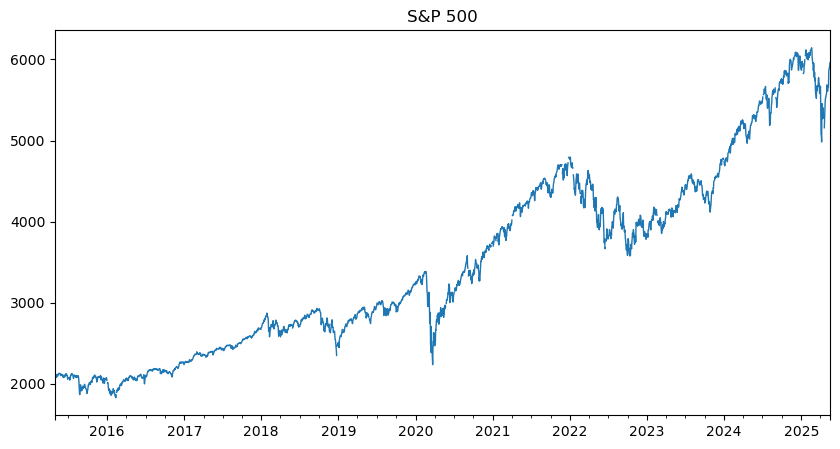

In [23]:
# Fred solo tiene los datos desde los 10 útlimo años
sp500=fred.get_series(series_id='SP500')
sp500.plot(figsize=(10,5),title='S&P 500',linewidth=1)

In [25]:
# desde fred los datos de sp500 solo disponene los 10 utlmos años
# me he desacrado un documento con todo el regitro hasta 2023
# tengo dos csc --> los voy a juntar ya que tienen rangos de años distintos
sp500_df_a=pd.read_csv('C:/Users/david/Desktop/Curso ML/Pandas/sp500_a.csv')
sp500_df_b=pd.read_csv('C:/Users/david/Desktop/Curso ML/Pandas/sp500_b.csv')

# IMN
#sp500_df_a=pd.read_csv('C:/Users/Monica Luna/Desktop/Curso ML/Pandas/sp500_a.csv')
#sp500_df_b=pd.read_csv('C:/Users/Monica Luna/Desktop/Curso ML/Pandas/sp500_b.csv')


In [27]:
sp500_df_b

,Date,Open,High,Low,Close,Adj Close,Volume
0,1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0
1,1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
2,1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
3,1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
4,1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0
...,...,...,...,...,...,...,...
23318,2020-10-29,3277.169922,3341.050049,3259.820068,3310.110107,3310.110107,4903070000
23319,2020-10-30,3293.590088,3304.929932,3233.939941,3269.959961,3269.959961,4840450000
23320,2020-11-02,3296.199951,3330.139893,3279.739990,3310.239990,3310.239990,4310590000
23321,2020-11-03,3336.250000,3389.489990,3336.250000,3369.159912,3369.159912,4220070000


In [29]:
sp500_df_b.drop(columns=['Open','High','Low','Adj Close','Volume'], inplace=True)

In [31]:
sp500_df_a.drop(columns=['Abrir','Alto','Bajo'], inplace=True)

In [33]:
sp500_df_a.rename(columns={'Cerrar/último':'SP500'},inplace=True)
sp500_df_b.rename(columns={'Date':'Fecha','Close':'SP500'},inplace=True)

In [35]:
sp500_df_a['Fecha']=pd.to_datetime(sp500_df_a['Fecha'])

In [37]:
sp500_df_b['Fecha']=pd.to_datetime(sp500_df_b['Fecha'])

In [39]:
sp500_df= pd.concat([sp500_df_a, sp500_df_b], ignore_index=True)

In [41]:
sp500_df=sp500_df.drop_duplicates(subset='Fecha',keep='first')

In [43]:
sp500_df=sp500_df.sort_values('Fecha').reset_index(drop=True)

In [45]:
sp500_df

,Fecha,SP500
0,1927-12-30,17.660000
1,1928-01-03,17.760000
2,1928-01-04,17.719999
3,1928-01-05,17.549999
4,1928-01-06,17.660000
...,...,...
24457,2025-05-07,5631.280000
24458,2025-05-08,5663.940000
24459,2025-05-09,5659.910000
24460,2025-05-12,5844.190000


<Axes: xlabel='Fecha', ylabel='SP500'>

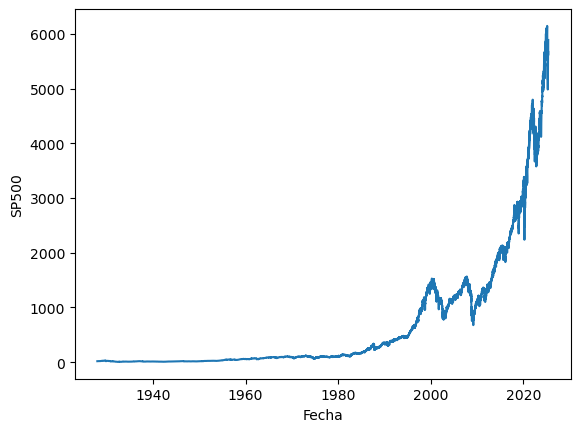

In [47]:
sns.lineplot(data=sp500_df, x='Fecha',y='SP500')

In [52]:
# sin embargo, debido a los fin de semana y festivos hay muchas fechas no existentes. vamos a corregirlo

In [49]:
sp500_df['Fecha']=pd.to_datetime(sp500_df['Fecha'])

In [51]:
# 1. Crear el rango completo de fechas
all_dates = pd.date_range(start=sp500_df['Fecha'].min(), end=sp500_df['Fecha'].max(), freq='D')

# 2. Crear un nuevo DataFrame con todas las fechas
fecha_completa_df = pd.DataFrame({'Fecha': all_dates})

In [53]:
sp500_full = fecha_completa_df.merge(sp500_df, on='Fecha', how='left')


In [55]:
sp500_full.isnull().sum() # ahota tenemos muchos na correspondientes a los dias festivos y  fin de semana

Fecha        0
SP500    11103
dtype: int64

In [57]:
sp500_full['SP500'] = sp500_full['SP500'].ffill()


In [59]:
sp500_full.isnull().sum()

Fecha    0
SP500    0
dtype: int64

<Axes: xlabel='Fecha', ylabel='SP500'>

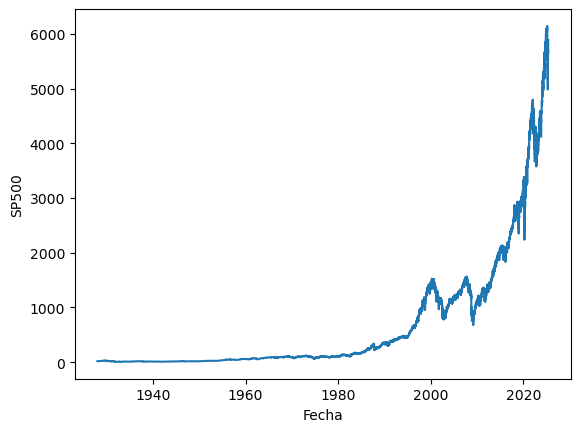

In [61]:
sns.lineplot(data=sp500_full, x='Fecha',y='SP500')

# Preparación y limpieza de datos

In [63]:
# encontramos fechas comunes entre ambos indices
fechas_comunes = df_ur.index.intersection(df_house.index)


In [35]:
# podemos hacerlo de todos
#fechas_comunes_b = df_ur.index.intersection(df_inc.index).intersection(df_house.index).intersection(df_cpi_final.index)


In [65]:
fechas_comunes

DatetimeIndex(['1976-01-01', '1976-04-01', '1976-07-01', '1976-10-01',
               '1977-01-01', '1977-04-01', '1977-07-01', '1977-10-01',
               '1978-01-01', '1978-04-01',
               ...
               '2022-07-01', '2022-10-01', '2023-01-01', '2023-04-01',
               '2023-07-01', '2023-10-01', '2024-01-01', '2024-04-01',
               '2024-07-01', '2024-10-01'],
              dtype='datetime64[ns]', length=196, freq='QS-OCT')

In [67]:
df_house

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
1975-01-01,75.11,61.63,59.76,66.53,41.69,54.34,62.39,77.06,47.79,65.94,...,74.97,67.87,55.86,55.17,77.36,69.76,46.33,50.32,61.85,49.93
1975-04-01,72.05,63.78,59.67,60.25,42.77,54.65,62.60,89.63,46.99,83.32,...,70.43,68.82,58.55,58.86,76.70,66.76,47.31,64.69,62.82,47.93
1975-07-01,74.51,67.46,59.37,64.90,44.35,55.20,61.88,115.73,47.08,66.76,...,64.99,67.74,56.16,55.32,67.10,67.44,49.74,65.76,64.84,50.14
1975-10-01,71.44,68.66,56.21,62.90,45.78,54.68,61.76,71.70,54.35,68.19,...,63.84,70.91,59.24,59.91,72.87,67.85,48.11,65.87,69.01,53.51
1976-01-01,76.92,70.52,58.92,66.90,47.82,54.99,64.74,79.57,53.03,67.98,...,62.84,70.46,58.49,61.49,117.03,69.42,50.39,61.31,65.46,54.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-01,494.24,435.76,705.54,443.03,926.65,825.48,620.73,694.88,1032.80,802.84,...,599.63,651.09,509.09,795.96,782.09,690.78,960.14,321.70,552.36,460.00
2024-01-01,502.48,444.06,708.88,445.94,941.18,837.24,623.03,717.06,1052.85,810.99,...,604.69,662.25,514.83,805.60,799.33,703.21,975.55,319.57,560.34,467.76
2024-04-01,515.15,460.94,722.09,456.00,956.39,852.49,652.32,723.35,1094.37,819.19,...,612.39,674.33,521.74,825.38,836.65,727.74,1006.60,333.50,578.87,481.47
2024-07-01,521.27,466.19,728.74,464.28,965.29,854.94,665.44,740.18,1066.02,823.69,...,616.42,681.73,522.40,831.42,854.72,733.38,1008.52,336.15,588.56,488.59


In [69]:
df_ur=df_ur.loc[fechas_comunes]
df_house=df_house.loc[fechas_comunes]

también debemos eliinar la columna Iowa de todos ya que en dr_inc no hay datos:

df_urb=df_urb.drop(columns='Iowa', axis=1) 
df_incb=df_incb.drop(columns='Iowa', axis=1) 
df_houseb=df_houseb.drop(columns='Iowa', axis=1) 
df_cpi_finalb=df_cpi_finalb.drop(columns='Iowa', axis=1) 


In [71]:
# Convierte cada df a formato largo
ur_long = df_ur.reset_index().melt(id_vars='index', var_name='Estado', value_name='Unemployment')
house_long=df_house.reset_index().melt(id_vars='index', var_name='Estado', value_name='HousePrice')

In [73]:
ur_long.rename(columns={'index':'Fecha'}, inplace=True)
house_long.rename(columns={'index':'Fecha'}, inplace=True)

In [75]:
# unimos ambos df
df_base=ur_long.merge(house_long, on=['Fecha','Estado'])

In [77]:
df_base

,Fecha,Estado,Unemployment,HousePrice
0,1976-01-01,Alabama,6.7,76.92
1,1976-04-01,Alabama,6.5,74.07
2,1976-07-01,Alabama,6.5,77.08
3,1976-10-01,Alabama,6.9,79.49
4,1977-01-01,Alabama,7.2,81.11
...,...,...,...,...
9991,2023-10-01,Wyoming,2.8,460.00
9992,2024-01-01,Wyoming,2.8,467.76
9993,2024-04-01,Wyoming,3.0,481.47
9994,2024-07-01,Wyoming,3.3,488.59


In [79]:
df_base.shape

(9996, 4)

In [554]:
# continuamos con df_base

In [81]:
df_base.isnull().sum()

Fecha           0
Estado          0
Unemployment    0
HousePrice      0
dtype: int64

In [83]:
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9996 entries, 0 to 9995
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Fecha         9996 non-null   datetime64[ns]
 1   Estado        9996 non-null   object        
 2   Unemployment  9996 non-null   float64       
 3   HousePrice    9996 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 312.5+ KB


In [560]:
df_base.describe()

,Fecha,Unemployment,HousePrice
count,9996,9996.000000,9996.000000
mean,2000-05-16 13:35:30.612244992,5.773719,266.805447
min,1976-01-01 00:00:00,1.700000,37.710000
25%,1988-03-09 06:00:00,4.200000,128.800000
50%,2000-05-16 12:00:00,5.400000,228.360000
75%,2012-07-24 00:00:00,7.000000,340.655000
max,2024-10-01 00:00:00,30.500000,1256.200000
std,NaN,2.226522,175.225887


# Análisi exploratorio de datos EDA

In [562]:
df_base

,Fecha,Estado,Unemployment,HousePrice
0,1976-01-01,Alabama,6.7,76.92
1,1976-04-01,Alabama,6.5,74.07
2,1976-07-01,Alabama,6.5,77.08
3,1976-10-01,Alabama,6.9,79.49
4,1977-01-01,Alabama,7.2,81.11
...,...,...,...,...
9991,2023-10-01,Wyoming,2.8,460.00
9992,2024-01-01,Wyoming,2.8,467.76
9993,2024-04-01,Wyoming,3.0,481.47
9994,2024-07-01,Wyoming,3.3,488.59


In [85]:
# creamos data frame con las dos variables : unemp y house price
pivot_base=df_base.pivot(index='Fecha',columns='Estado', values=['Unemployment','HousePrice'])

In [87]:
pivot_base

Unemployment                                              \
Estado          Alabama Alaska Arizona Arkansas California Colorado   
Fecha                                                                 
1976-01-01          6.7    7.1    10.2      7.3        9.2      5.8   
1976-04-01          6.5    7.0    10.0      7.2        9.0      5.6   
1976-07-01          6.5    7.3     9.7      6.8        9.0      5.7   
1976-10-01          6.9    8.3     9.5      6.5        9.4      6.2   
1977-01-01          7.2    9.1     9.3      6.6        9.3      6.6   
...                 ...    ...     ...      ...        ...      ...   
2023-10-01          2.7    4.5     3.7      3.4        5.0      3.5   
2024-01-01          2.9    4.4     3.5      3.4        5.1      3.8   
2024-04-01          2.9    4.5     3.4      3.4        5.2      4.0   
2024-07-01          3.0    4.7     3.6      3.4        5.4      4.3   
2024-10-01          3.3    4.7     3.9      3.6        5.5      4.6   

                                                              ...  \
Estado     Connecticut Delaware District of Columbia Florida  ...   
Fecha                                                         ...   
1976-01-01         9.7      8.0                  8.8     9.6  ...   
1976-04-01         9.6      8.2                  8.6     9.5  ...   
1976-07-01         9.1      8.9                  8.4     9.0  ...   
1976-10-01         8.7      9.3                  8.7     9.0  ...   
1977-01-01         8.2      9.3                  8.8     9.1  ...   
...                ...      ...                  ...     ...  ...   
2023-10-01         3.3      3.9                  4.9     3.1  ...   
2024-01-01         3.3      3.8                  5.1     3.2  ...   
2024-04-01         3.1      3.7                  5.2     3.3  ...   
2024-07-01         3.1      3.7                  5.3     3.4  ...   
2024-10-01         3.2      3.6                  5.3     3.5  ...   

             HousePrice                                                        \
Estado     South Dakota Tennessee   Texas    Utah Vermont Virginia Washington   
Fecha                                                                           
1976-01-01        62.84     70.46   58.49   61.49  117.03    69.42      50.39   
1976-04-01        65.33     68.71   63.50   61.65   57.50    68.58      53.63   
1976-07-01        68.80     71.74   63.33   64.75   81.27    70.59      56.63   
1976-10-01        68.90     71.76   63.07   64.29   79.65    72.10      57.80   
1977-01-01        62.69     74.73   65.95   69.80  115.98    73.06      59.79   
...                 ...       ...     ...     ...     ...      ...        ...   
2023-10-01       599.63    651.09  509.09  795.96  782.09   690.78     960.14   
2024-01-01       604.69    662.25  514.83  805.60  799.33   703.21     975.55   
2024-04-01       612.39    674.33  521.74  825.38  836.65   727.74    1006.60   
2024-07-01       616.42    681.73  522.40  831.42  854.72   733.38    1008.52   
2024-10-01       621.11    686.75  526.70  834.94  851.72   738.44    1008.93   

                                            
Estado     West Virginia Wisconsin Wyoming  
Fecha                                       
1976-01-01         61.31     65.46   54.43  
1976-04-01         67.47     65.29   55.28  
1976-07-01         69.47     67.49   58.43  
1976-10-01         63.32     68.41   63.07  
1977-01-01         69.72     73.06   63.42  
...                  ...       ...     ...  
2023-10-01        321.70    552.36  460.00  
2024-01-01        319.57    560.34  467.76  
2024-04-01        333.50    578.87  481.47  
2024-07-01        336.15    588.56  488.59  
2024-10-01        343.64    588.27  488.48  

[196 rows x 102 columns]

In [89]:
# determianmos matriz correlacion entre columnas correspondientes a Unempl y las de House
corr_matrix=pivot_base['Unemployment'].corrwith(pivot_base['HousePrice'])

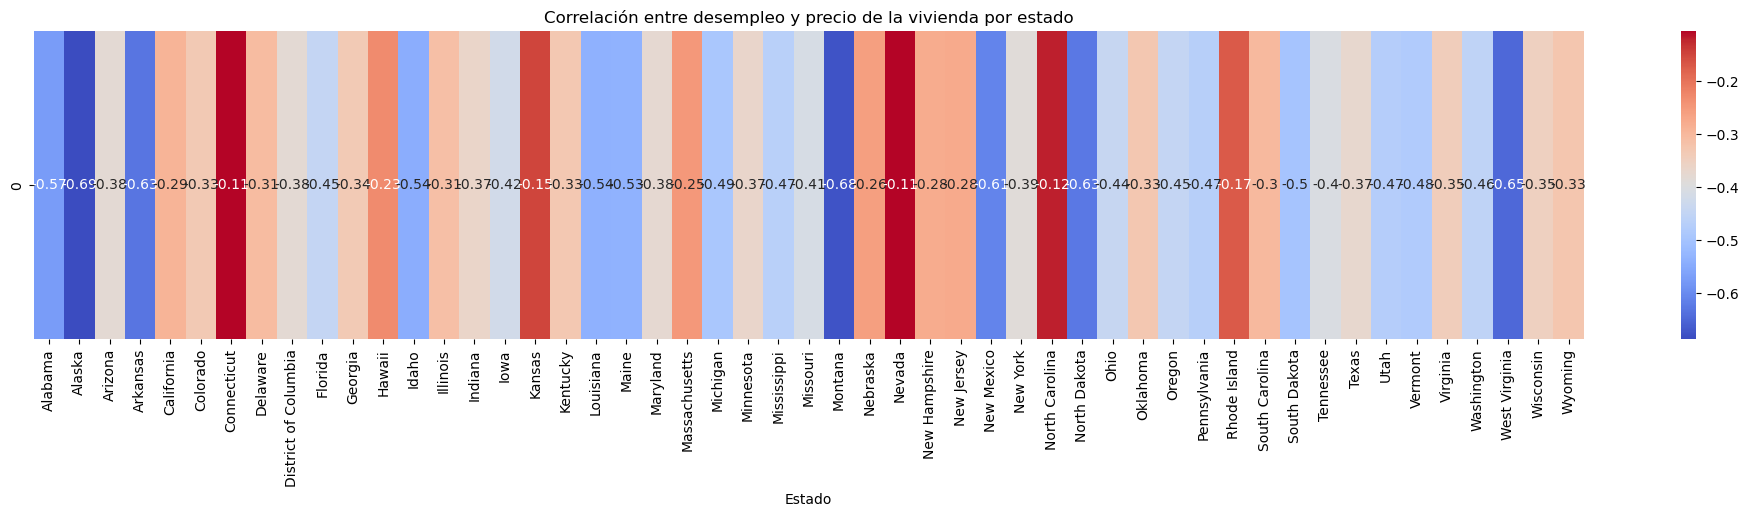

In [91]:
plt.figure(figsize=(25,4))
sns.heatmap(corr_matrix.to_frame().T, annot=True, cmap='coolwarm')
plt.title('Correlación entre desempleo y precio de la vivienda por estado')
plt.show()

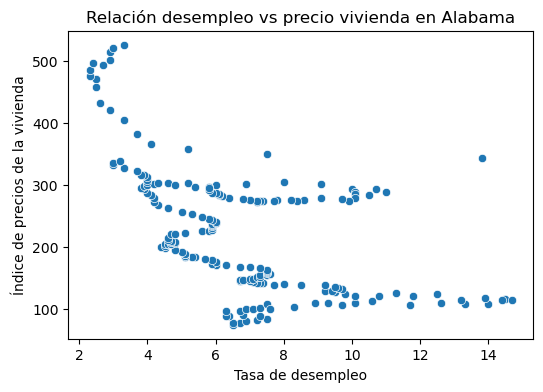

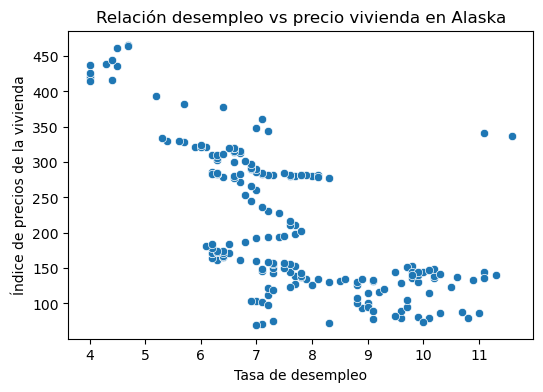

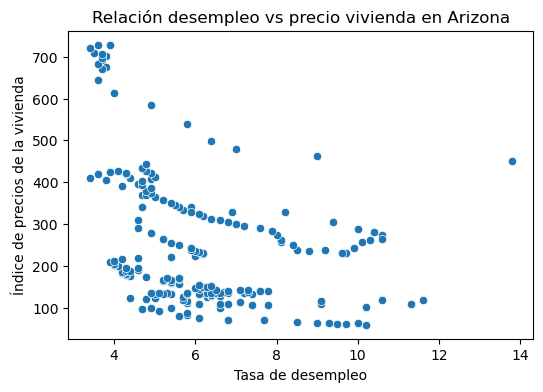

In [93]:
estados_clave = df_base['Estado'].unique()[:3]  # Elige 3 estados para ejemplo
for estado in estados_clave:
    subset = df_base[df_base['Estado'] == estado]
    plt.figure(figsize=(6,4))
    sns.scatterplot(x='Unemployment', y='HousePrice', data=subset)
    plt.title(f'Relación desempleo vs precio vivienda en {estado}')
    plt.xlabel('Tasa de desempleo')
    plt.ylabel('Índice de precios de la vivienda')
    plt.show()


In [95]:
lags = [1, 2, 4]
for lag in lags:
    df_base[f'Unemployment_lag{lag}'] = df_base.groupby('Estado')['Unemployment'].shift(lag)
    corr = df_base[['Unemployment_lag'+str(lag), 'HousePrice']].corr().iloc[0,1]
    # es hacer esto para las tres columnas creadas: df_base['Unemployment_lag1'].corr(df_base['HousePrice'])
    print(f'Correlación HousePrice vs Unemployment (rezago {lag}): {corr:.2f}')


Correlación HousePrice vs Unemployment (rezago 1): -0.27
Correlación HousePrice vs Unemployment (rezago 2): -0.27
Correlación HousePrice vs Unemployment (rezago 4): -0.25


In [97]:
#se han creado las columnas lag respecto Unemp
df_base
# vemos como se desplaza el dato con el lag indicado

,Fecha,Estado,Unemployment,HousePrice,Unemployment_lag1,Unemployment_lag2,Unemployment_lag4
0,1976-01-01,Alabama,6.7,76.92,NaN,NaN,NaN
1,1976-04-01,Alabama,6.5,74.07,6.7,NaN,NaN
2,1976-07-01,Alabama,6.5,77.08,6.5,6.7,NaN
3,1976-10-01,Alabama,6.9,79.49,6.5,6.5,NaN
4,1977-01-01,Alabama,7.2,81.11,6.9,6.5,6.7
...,...,...,...,...,...,...,...
9991,2023-10-01,Wyoming,2.8,460.00,2.8,2.9,3.5
9992,2024-01-01,Wyoming,2.8,467.76,2.8,2.8,3.2
9993,2024-04-01,Wyoming,3.0,481.47,2.8,2.8,2.9
9994,2024-07-01,Wyoming,3.3,488.59,3.0,2.8,2.8


# Ingeniería de variables y alerta temprana

In [101]:
# 1 . Variación temporal trimestral y anula --> cambios bruscos o aceleraciones en las tendencias
# pct_change-->variación relativa

# variación trimestral
df_base['Unemployment_pct_change']=df_base.groupby('Estado')['Unemployment'].pct_change(1)
df_base['HousePrice_pct_change'] = df_base.groupby('Estado')['HousePrice'].pct_change(1)

# Variación anual (4 trimestres)
df_base['Unemployment_pct_change_year']=df_base.groupby('Estado')['Unemployment'].pct_change(4)
df_base['HousePrice_pct_change_year'] = df_base.groupby('Estado')['HousePrice'].pct_change(4)

In [106]:
df_base

,Fecha,Estado,Unemployment,HousePrice,Unemployment_lag1,Unemployment_lag2,Unemployment_lag4,Unemployment_pct_change,HousePrice_pct_change,Unemployment_pct_change_year,HousePrice_pct_change_year
0,1976-01-01,Alabama,6.7,76.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1976-04-01,Alabama,6.5,74.07,6.7,NaN,NaN,-0.029851,-0.037051,NaN,NaN
2,1976-07-01,Alabama,6.5,77.08,6.5,6.7,NaN,0.000000,0.040637,NaN,NaN
3,1976-10-01,Alabama,6.9,79.49,6.5,6.5,NaN,0.061538,0.031266,NaN,NaN
4,1977-01-01,Alabama,7.2,81.11,6.9,6.5,6.7,0.043478,0.020380,0.074627,0.054472
...,...,...,...,...,...,...,...,...,...,...,...
9991,2023-10-01,Wyoming,2.8,460.00,2.8,2.9,3.5,0.000000,-0.021547,-0.200000,0.024796
9992,2024-01-01,Wyoming,2.8,467.76,2.8,2.8,3.2,0.000000,0.016870,-0.125000,0.043548
9993,2024-04-01,Wyoming,3.0,481.47,2.8,2.8,2.9,0.071429,0.029310,0.034483,0.054006
9994,2024-07-01,Wyoming,3.3,488.59,3.0,2.8,2.8,0.100000,0.014788,0.178571,0.039266


In [103]:
# empleamos funcion ROLLING para suavizar las series y capturar la estabilidad 
# o inestabilidad, que también son indicadores importantes. Volatilidad--> std

df_base['Unemployment_rolling4'] = df_base.groupby('Estado')['Unemployment'].transform(lambda x: x.rolling(4).mean())

df_base['HousePrice_rolling4'] = df_base.groupby('Estado')['HousePrice'].transform(lambda x: x.rolling(4).mean())

df_base['Unemployment_volatility'] = df_base.groupby('Estado')['Unemployment'].transform(lambda x: x.rolling(4).std())

df_base['HousePrice_volatility'] = df_base.groupby('Estado')['HousePrice'].transform(lambda x: x.rolling(4).std())




In [586]:
df_base

,Fecha,Estado,Unemployment,HousePrice,Unemployment_lag1,Unemployment_lag2,Unemployment_lag4,Unemployment_pct_change,HousePrice_pct_change,Unemployment_pct_change_year,HousePrice_pct_change_year,Unemployment_rolling4,HousePrice_rolling4,Unemployment_volatility,HousePrice_volatility
0,1976-01-01,Alabama,6.7,76.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1976-04-01,Alabama,6.5,74.07,6.7,NaN,NaN,-0.029851,-0.037051,NaN,NaN,NaN,NaN,NaN,NaN
2,1976-07-01,Alabama,6.5,77.08,6.5,6.7,NaN,0.000000,0.040637,NaN,NaN,NaN,NaN,NaN,NaN
3,1976-10-01,Alabama,6.9,79.49,6.5,6.5,NaN,0.061538,0.031266,NaN,NaN,6.650,76.8900,0.191485,2.217311
4,1977-01-01,Alabama,7.2,81.11,6.9,6.5,6.7,0.043478,0.020380,0.074627,0.054472,6.775,77.9375,0.340343,3.064195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,2023-10-01,Wyoming,2.8,460.00,2.8,2.9,3.5,0.000000,-0.021547,-0.200000,0.024796,2.925,458.7925,0.189297,9.042903
9992,2024-01-01,Wyoming,2.8,467.76,2.8,2.8,3.2,0.000000,0.016870,-0.125000,0.043548,2.825,463.6725,0.050000,6.301467
9993,2024-04-01,Wyoming,3.0,481.47,2.8,2.8,2.9,0.071429,0.029310,0.034483,0.054006,2.850,469.8400,0.100000,8.878682
9994,2024-07-01,Wyoming,3.3,488.59,3.0,2.8,2.8,0.100000,0.014788,0.178571,0.039266,2.975,474.4550,0.236291,12.945765


In [105]:
# Añadimos SP500  --> sp500_full
# unimos con la tabla anterior
df_base=df_base.merge(sp500_full,on='Fecha',how='left')

In [107]:
df_base.shape

(9996, 16)

In [109]:
df_base.isnull().sum()

Fecha                             0
Estado                            0
Unemployment                      0
HousePrice                        0
Unemployment_lag1                51
Unemployment_lag2               102
Unemployment_lag4               204
Unemployment_pct_change          51
HousePrice_pct_change            51
Unemployment_pct_change_year    204
HousePrice_pct_change_year      204
Unemployment_rolling4           153
HousePrice_rolling4             153
Unemployment_volatility         153
HousePrice_volatility           153
SP500                             0
dtype: int64

In [111]:
df_base['SP500_pct_change'] = df_base['SP500'].pct_change(fill_method=None)
df_base['SP500_pct_change_year'] = df_base['SP500'].pct_change(4,fill_method=None)

In [113]:
# Ajustamos parámetros de alterta

# 1. Marca con un 1 (alerta) los periodos donde el desempleo sube más de un 8%
# respecto al periodo anterior; en caso contrario, marca 0 (astype(int))
df_base['alerta_unemployment'] = (df_base['Unemployment_pct_change'] > 0.08).astype(int)


# 2.Marca con un 1 los periodos donde el precio de la vivienda cae más de 4% respecto al periodo anterior;
# en caso contrario, marca 0.
df_base['alerta_houseprice'] = (df_base['HousePrice_pct_change'] < -0.04).astype(int)

# 3. Marca con un 1 los periodos donde el S&P 500 cae más de 8% respecto al periodo anterior; 
# en caso contrario, marca 0
df_base['alerta_sp500'] = (df_base['SP500_pct_change'] < -0.08).astype(int)

In [115]:
df_base

,Fecha,Estado,Unemployment,HousePrice,Unemployment_lag1,Unemployment_lag2,Unemployment_lag4,Unemployment_pct_change,HousePrice_pct_change,Unemployment_pct_change_year,...,Unemployment_rolling4,HousePrice_rolling4,Unemployment_volatility,HousePrice_volatility,SP500,SP500_pct_change,SP500_pct_change_year,alerta_unemployment,alerta_houseprice,alerta_sp500
0,1976-01-01,Alabama,6.7,76.92,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,90.190002,NaN,NaN,0,0,0
1,1976-04-01,Alabama,6.5,74.07,6.7,NaN,NaN,-0.029851,-0.037051,NaN,...,NaN,NaN,NaN,NaN,102.239998,0.133607,NaN,0,0,0
2,1976-07-01,Alabama,6.5,77.08,6.5,6.7,NaN,0.000000,0.040637,NaN,...,NaN,NaN,NaN,NaN,103.589996,0.013204,NaN,0,0,0
3,1976-10-01,Alabama,6.9,79.49,6.5,6.5,NaN,0.061538,0.031266,NaN,...,6.650,76.8900,0.191485,2.217311,104.169998,0.005599,NaN,0,0,0
4,1977-01-01,Alabama,7.2,81.11,6.9,6.5,6.7,0.043478,0.020380,0.074627,...,6.775,77.9375,0.340343,3.064195,107.459999,0.031583,0.191485,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,2023-10-01,Wyoming,2.8,460.00,2.8,2.9,3.5,0.000000,-0.021547,-0.200000,...,2.925,458.7925,0.189297,9.042903,4288.050000,-0.036476,0.195902,0,0,0
9992,2024-01-01,Wyoming,2.8,467.76,2.8,2.8,3.2,0.000000,0.016870,-0.125000,...,2.825,463.6725,0.050000,6.301467,4769.830000,0.112354,0.242305,0,0,0
9993,2024-04-01,Wyoming,3.0,481.47,2.8,2.8,2.9,0.071429,0.029310,0.034483,...,2.850,469.8400,0.100000,8.878682,5243.770000,0.099362,0.276071,0,0,0
9994,2024-07-01,Wyoming,3.3,488.59,3.0,2.8,2.8,0.100000,0.014788,0.178571,...,2.975,474.4550,0.236291,12.945765,5475.090000,0.044113,0.230252,1,0,0


In [117]:
# Creamos altera compuesta --> target
# la voy a crear si se  activa dos señales simultáneamente
df_base['alerta_total'] = (df_base[['alerta_unemployment', 'alerta_houseprice', 'alerta_sp500']].sum(axis=1) >= 2).astype(int)

In [119]:
df_base['alerta_total'].value_counts()

alerta_total
0    9640
1     356
Name: count, dtype: int64

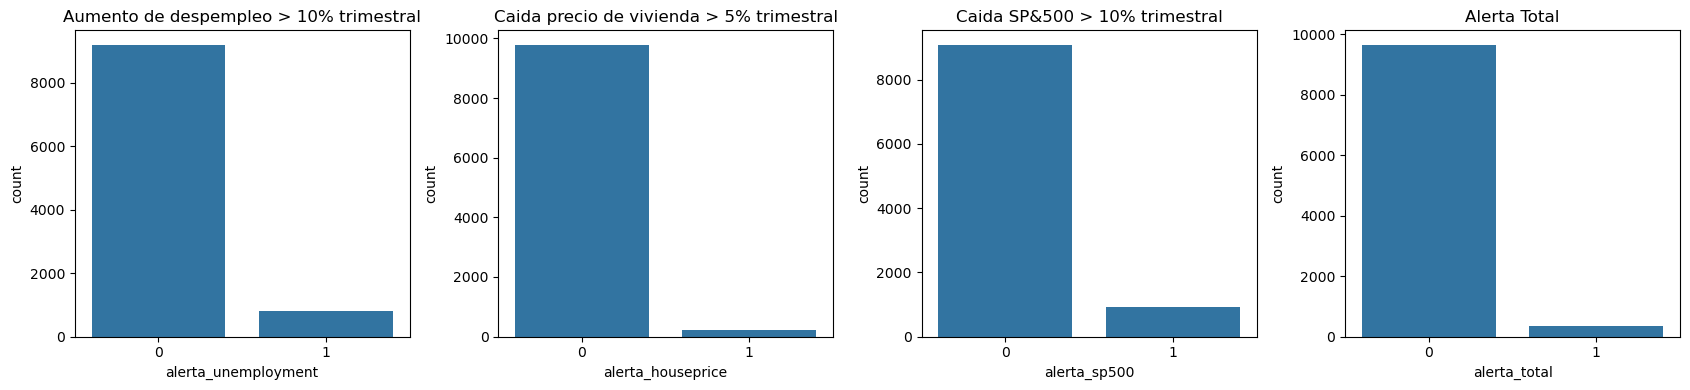

In [121]:
# hacemos algunas representaciones de los resultados
fig, ax=plt.subplots(1,4, figsize=(17,4))
sns.countplot(data=df_base, x='alerta_unemployment', ax=ax[0])
sns.countplot(data=df_base, x='alerta_houseprice', ax=ax[1])
sns.countplot(data=df_base, x='alerta_sp500', ax=ax[2])
sns.countplot(data=df_base, x='alerta_total', ax=ax[3])
ax[0].set_title('Aumento de despempleo > 10% trimestral')
ax[1].set_title('Caida precio de vivienda > 5% trimestral')
ax[2].set_title('Caida SP&500 > 10% trimestral')
ax[3].set_title('Alerta Total')

plt.tight_layout()
plt.show()

# 1. Marca con un 1 (alerta) los periodos donde el desempleo sube más de un 10%
# 2.Marca con un 1 los periodos donde el precio de la vivienda cae más de 5% respecto al periodo anterior
# 3. Marca con un 1 los periodos donde el S&P 500 cae más de 10% respecto al periodo anterior

In [123]:
# Preparamos los datos para el modelo
features=[
    'Unemployment', 'Unemployment_pct_change', 'Unemployment_pct_change_year',
    'Unemployment_rolling4', 'Unemployment_volatility',
    'HousePrice', 'HousePrice_pct_change', 'HousePrice_pct_change_year',
    'HousePrice_rolling4', 'HousePrice_volatility',
    'SP500', 'SP500_pct_change', 'SP500_pct_change_year'  
]

target= 'alerta_total'

In [125]:
# creamos df modelo eliminando nuelo generados por rezagos y rolling
df_model=df_base.dropna(subset=features + [target])

In [127]:
df_model

,Fecha,Estado,Unemployment,HousePrice,Unemployment_lag1,Unemployment_lag2,Unemployment_lag4,Unemployment_pct_change,HousePrice_pct_change,Unemployment_pct_change_year,...,HousePrice_rolling4,Unemployment_volatility,HousePrice_volatility,SP500,SP500_pct_change,SP500_pct_change_year,alerta_unemployment,alerta_houseprice,alerta_sp500,alerta_total
4,1977-01-01,Alabama,7.2,81.11,6.9,6.5,6.7,0.043478,0.020380,0.074627,...,77.9375,0.340343,3.064195,107.459999,0.031583,0.191485,0,0,0,0
5,1977-04-01,Alabama,7.5,83.39,7.2,6.9,6.5,0.041667,0.028110,0.153846,...,80.2675,0.427200,2.659854,99.209999,-0.076773,-0.029636,0,0,0,0
6,1977-07-01,Alabama,7.3,88.36,7.5,7.2,6.5,-0.026667,0.059599,0.123077,...,83.0875,0.250000,3.861920,100.099998,0.008971,-0.033690,0,0,0,0
7,1977-10-01,Alabama,6.8,89.21,7.3,7.5,6.9,-0.068493,0.009620,-0.014493,...,85.5175,0.294392,3.901567,96.529999,-0.035664,-0.073342,0,0,0,0
8,1978-01-01,Alabama,6.4,88.49,6.8,7.3,7.2,-0.058824,-0.008071,-0.111111,...,87.3625,0.496655,2.674589,95.099998,-0.014814,-0.115020,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,2023-10-01,Wyoming,2.8,460.00,2.8,2.9,3.5,0.000000,-0.021547,-0.200000,...,458.7925,0.189297,9.042903,4288.050000,-0.036476,0.195902,0,0,0,0
9992,2024-01-01,Wyoming,2.8,467.76,2.8,2.8,3.2,0.000000,0.016870,-0.125000,...,463.6725,0.050000,6.301467,4769.830000,0.112354,0.242305,0,0,0,0
9993,2024-04-01,Wyoming,3.0,481.47,2.8,2.8,2.9,0.071429,0.029310,0.034483,...,469.8400,0.100000,8.878682,5243.770000,0.099362,0.276071,0,0,0,0
9994,2024-07-01,Wyoming,3.3,488.59,3.0,2.8,2.8,0.100000,0.014788,0.178571,...,474.4550,0.236291,12.945765,5475.090000,0.044113,0.230252,1,0,0,0


In [129]:
df_base['alerta_total'].value_counts()

alerta_total
0    9640
1     356
Name: count, dtype: int64

In [131]:
# dividimos entre train test
# podemos entrenar con datos hasta 2017 y el test con el resto
split_date='2016-12-31'
train=df_model.loc[df_model['Fecha']<=split_date]
test=df_model.loc[df_model['Fecha']>split_date]

In [133]:
X_train=train[features]
y_train=train[target]
X_test=test[features]
y_test=test[target]

In [135]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(8160, 13) (8160,) (1632, 13) (1632,)


In [137]:
# Entrenamos modelo interpretable --> Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

model = RandomForestClassifier(
    n_estimators=100,
    class_weight={0:1, 1:5},  # Ajusta el peso según el recall deseado --> ajuste realizado tran un primer entranamiento
    random_state=42
)
model.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 5}, random_state=42)

In [139]:
# Evaluamos el modelo en el test
X_test_pred=model.predict(X_test)
print(classification_report(y_test, X_test_pred))
print(confusion_matrix(y_test, X_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1579
           1       1.00      0.98      0.99        53

    accuracy                           1.00      1632
   macro avg       1.00      0.99      1.00      1632
weighted avg       1.00      1.00      1.00      1632

[[1579    0]
 [   1   52]]


In [141]:
# pruebo ahora con LogisticRegression
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression(max_iter=1000)
model2.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [143]:
# Evaluamos el modelo en el test
X_test_pred=model2.predict(X_test)
print(classification_report(y_test, X_test_pred))
print(confusion_matrix(y_test, X_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1579
           1       0.98      0.94      0.96        53

    accuracy                           1.00      1632
   macro avg       0.99      0.97      0.98      1632
weighted avg       1.00      1.00      1.00      1632

[[1578    1]
 [   3   50]]


In [150]:
# en el casop de que tuvieramos porblemas con la evalucion del modelo: 
# implemntamos SMOTE (Synthetic Minority Over-sampling Technique) 
# abordar el desbalance de clases y mejorar la capacidad del modelo para detectar alertas
!pip install imbalanced-learn


In [324]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
# aplicamos smote al conjunto de entrnamiento / no aplicar al test !!
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


In [326]:
# observamos la diferencia
print(X_train_res.shape,y_train_res.shape,X_train.shape,y_train.shape)

(3754, 13) (3754,) (1887, 13) (1887,)


In [328]:
# entrenamos de nuevo el modelo
model.fit(X_train_res,y_train_res)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [648]:
# Evalúa en el conjunto de test (sin SMOTE)
X_test_pred = model.predict(X_test)
print(classification_report(y_test, X_test_pred))
print(confusion_matrix(y_test, X_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1579
           1       0.98      0.94      0.96        53

    accuracy                           1.00      1632
   macro avg       0.99      0.97      0.98      1632
weighted avg       1.00      1.00      1.00      1632

[[1578    1]
 [   3   50]]


In [294]:
print("Antes de SMOTE:", y_train.value_counts())
print("Después de SMOTE:", pd.Series(y_train_res).value_counts())

Antes de SMOTE: alerta_total
0    1769
1     271
Name: count, dtype: int64
Después de SMOTE: alerta_total
0    1769
1    1769
Name: count, dtype: int64


# Análisis resultados

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Logistic regression coefficients: indicate how each variable influences the log odds of the alert probability
coef = pd.Series(model2.coef_[0], index=features)  # Coefficient for each variable
coef_sorted = coef.sort_values(key=np.abs, ascending=False)  # Sort by absolute value (most influential first)
print(coef_sorted)


SP500_pct_change               -7.550304
SP500_pct_change_year          -6.808892
Unemployment_rolling4          -4.006559
Unemployment                    3.689046
Unemployment_pct_change         3.370514
Unemployment_volatility        -1.997579
HousePrice_pct_change          -1.600859
HousePrice_pct_change_year     -1.223050
Unemployment_pct_change_year   -0.526389
HousePrice                     -0.056922
HousePrice_rolling4             0.055150
HousePrice_volatility           0.048595
SP500                          -0.000305
dtype: float64


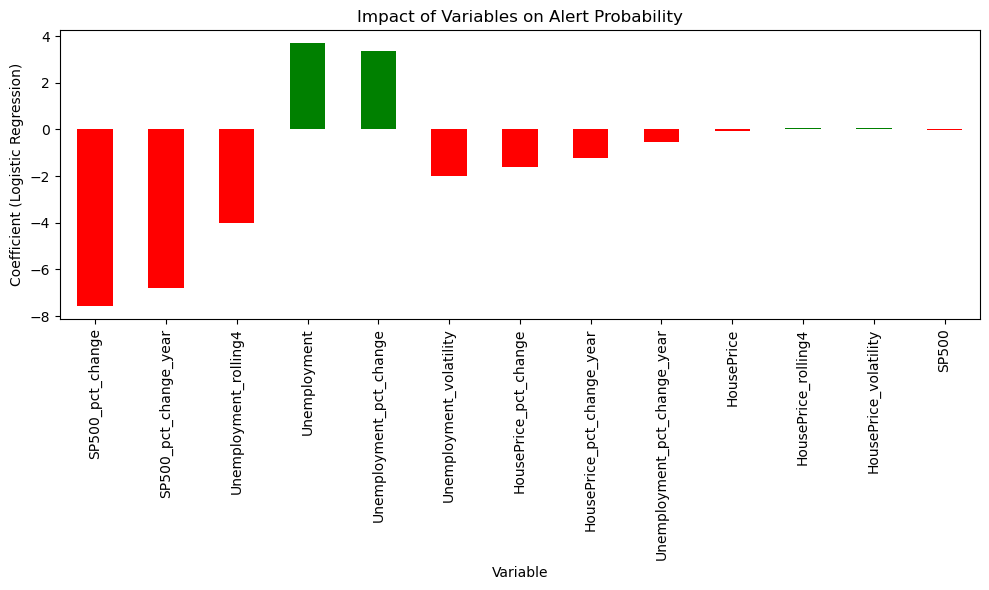

In [157]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
coef_sorted.plot(kind='bar', color=['red' if x < 0 else 'green' for x in coef_sorted])
plt.title('Impact of Variables on Alert Probability')
plt.ylabel('Coefficient (Logistic Regression)')
plt.xlabel('Variable')
plt.tight_layout()
plt.show()


In [180]:
# añadimos la columna alerta predicha como resultado del modelo X_test_pred = model.predict(X_test)
# Tomamos el df test que es el que dividimos en Train test segun fecha

In [149]:
test['alerta_predicha'] = model.predict(X_test)

C:\Users\david\AppData\Local\Temp\ipykernel_28268\98166777.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['alerta_predicha'] = model.predict(X_test)


In [151]:
df_test=test[['Fecha','Estado','alerta_total', 'alerta_predicha']]

In [163]:
df_test.rename(columns={'Fecha':'Date','Estado':'State','alerta_total':'actual_alert','alerta_predicha':'predicted_alert'}, inplace=True)
df_test

C:\Users\david\AppData\Local\Temp\ipykernel_28268\1334822412.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.rename(columns={'Fecha':'Date','Estado':'State','alerta_total':'actual_alert','alerta_predicha':'predicted_alert'}, inplace=True)


,Date,State,actual_alert,predicted_alert
164,2017-01-01,Alabama,0,0
165,2017-04-01,Alabama,0,0
166,2017-07-01,Alabama,0,0
167,2017-10-01,Alabama,0,0
168,2018-01-01,Alabama,0,0
...,...,...,...,...
9991,2023-10-01,Wyoming,0,0
9992,2024-01-01,Wyoming,0,0
9993,2024-04-01,Wyoming,0,0
9994,2024-07-01,Wyoming,0,0


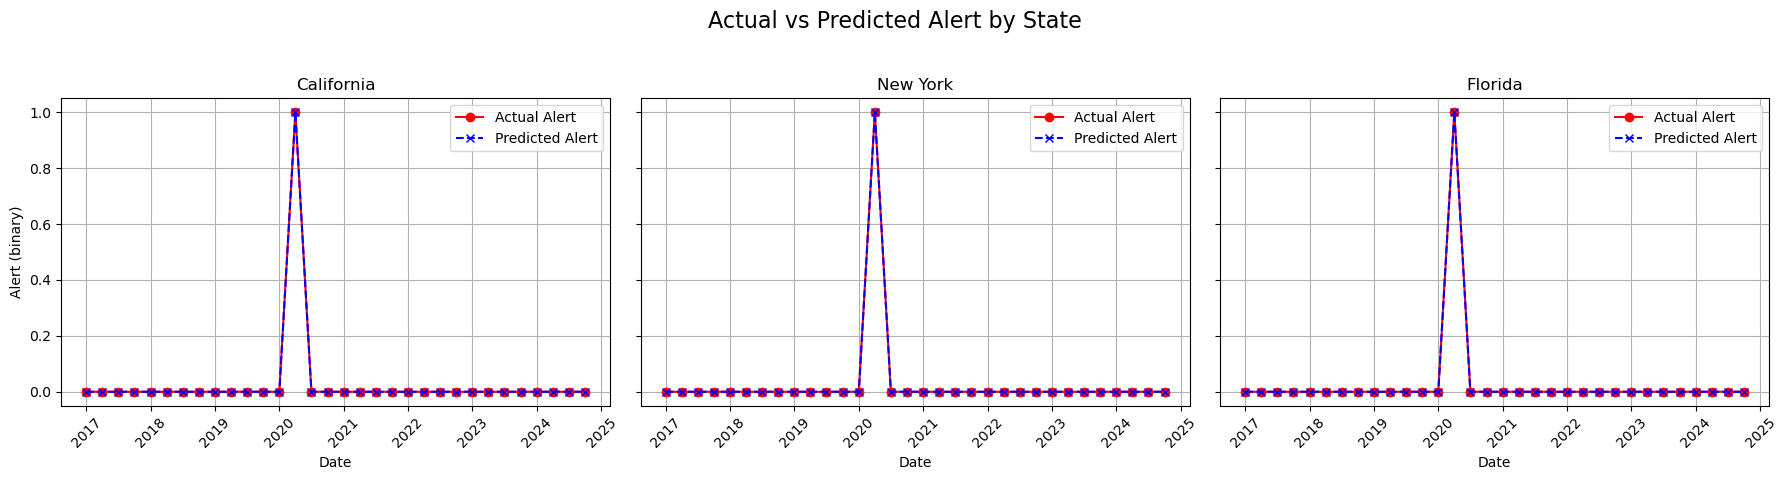

In [165]:
import matplotlib.pyplot as plt

def plot_alerts_by_states(df, states):
    n_states = len(states)
    fig, axes = plt.subplots(1, n_states, figsize=(6 * n_states, 5), sharey=True)

    for idx, state in enumerate(states):
        ax = axes[idx] if n_states > 1 else axes
        df_state = df.loc[df['State'] == state]
        
        if df_state.empty:
            ax.set_title(f'No data for {state}')
            ax.axis('off')
            continue
        
        ax.plot(df_state['Date'], df_state['actual_alert'], label='Actual Alert', color='red', marker='o')
        ax.plot(df_state['Date'], df_state['predicted_alert'], label='Predicted Alert', color='blue', marker='x', linestyle='--')
        ax.set_title(f'{state}')
        ax.set_xlabel('Date')
        if idx == 0:
            ax.set_ylabel('Alert (binary)')
        ax.legend()
        ax.grid(True)
        ax.tick_params(axis='x', rotation=45)
    
    plt.suptitle('Actual vs Predicted Alert by State', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Example usage
states = ['California', 'New York', 'Florida']
plot_alerts_by_states(df_test, states)


# Conclusiones